In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from typing import Optional, Union, Callable, Sequence
import anndata as ad

from input_feature_variance import feature_variance_per_latent_dimension, plot_feature_variance

In [2]:
# Read in the exmple dataset
adata = sc.read("/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/adata_example_latint.h5ad")
adata

AnnData object with n_obs × n_vars = 42475 × 9048
    obs: 'imagerow', 'imagecol', 'mod_id', 'batch_id', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'r0.8', 'sample', 'batch', 'extra_categorical_covs', 'patient', 'tissue', 'seurat_clusters', 'ann'
    uns: '_scvi', 'neighbors', 'umap'
    obsm: 'X_mvae', 'X_mvae_umap3d', 'X_pca', 'X_umap', 'X_z1_p', 'X_z1_p_mod', 'X_z1_s', 'X_z2_p', 'X_z2_p_mod', 'X_z2_s', 'spatial', 'z1_p', 'z1_p_mod', 'z1_s', 'z2_p', 'z2_p_mod', 'z2_s', 'z_mvae'
    layers: 'x1', 'x1_batch_free', 'x1_poe', 'x2_1'
    obsp: 'connectivities', 'distances'

In [3]:
# Calculate feature variance
feature_variance_per_latent_dimension(adata, key="z_mvae", n_features=50, plot_highly_variable_features=False, 
                                          plot_cov_matrices=False, return_variable_features=False)

In [4]:
# Show for example the 50 genes with most covariance for the latent dim 1
adata.uns["variable_features_per_latent_dim"]["LatentDim_1"]

rec.array([(0.44559577, 1.        , 'KLK3'),
           (0.35760489, 0.89648903, 'KLK2'),
           (0.26135133, 0.783258  , 'TFF3'),
           (0.20522306, 0.71722966, 'SPON2'),
           (0.15797653, 0.66164965, 'TRPM8'),
           (0.15240097, 0.65509065, 'TRGC1'),
           (0.14348156, 0.64459802, 'KLK4'),
           (0.14335186, 0.64444544, 'TMPRSS2'),
           (0.13941642, 0.63981585, 'SLC45A3'),
           (0.13195749, 0.63104129, 'PCAT14'),
           (0.13177903, 0.63083136, 'LRRC26'),
           (0.12948506, 0.62813277, 'AMACR'),
           (0.12769511, 0.62602711, 'GOLM1'),
           (0.12727037, 0.62552745, 'AZGP1'),
           (0.12726802, 0.62552468, 'TRPM4'),
           (0.12221858, 0.61958461, 'MLPH'),
           (0.12188311, 0.61918996, 'SMS'),
           (0.12110659, 0.61827648, 'FASN'),
           (0.1210358 , 0.61819321, 'PCAT4'),
           (0.117093  , 0.61355497, 'PDLIM5'),
           (0.11665817, 0.61304344, 'PCA3'),
           (0.11632539, 0.61265196, 

/home/josenachorr/miniconda3/envs/mvae_gabriele/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


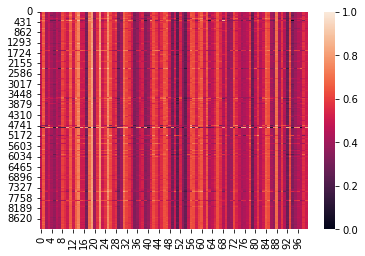

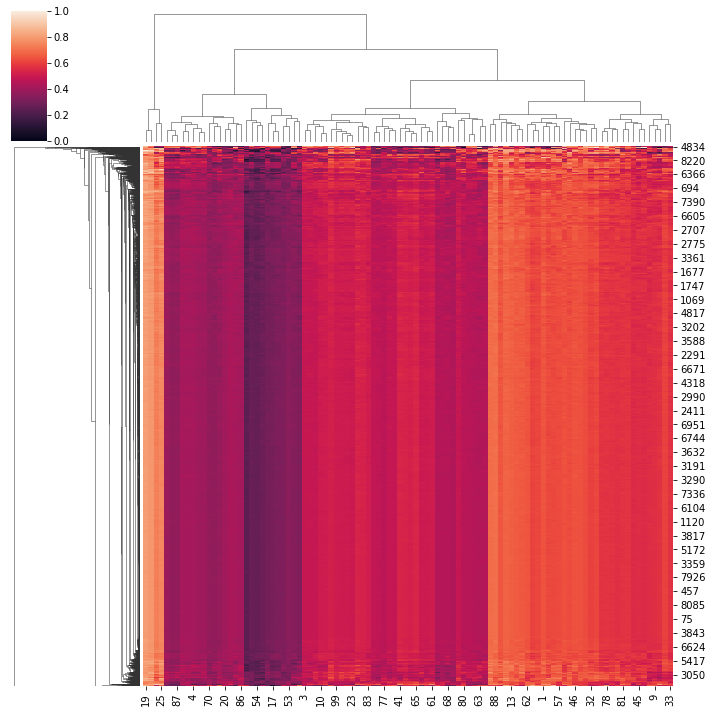

In [5]:
# Show the covariance matrices
feature_variance_per_latent_dimension(adata, key="z_mvae", n_features=50, plot_highly_variable_features=False, 
                                          plot_cov_matrices=True, return_variable_features=False)

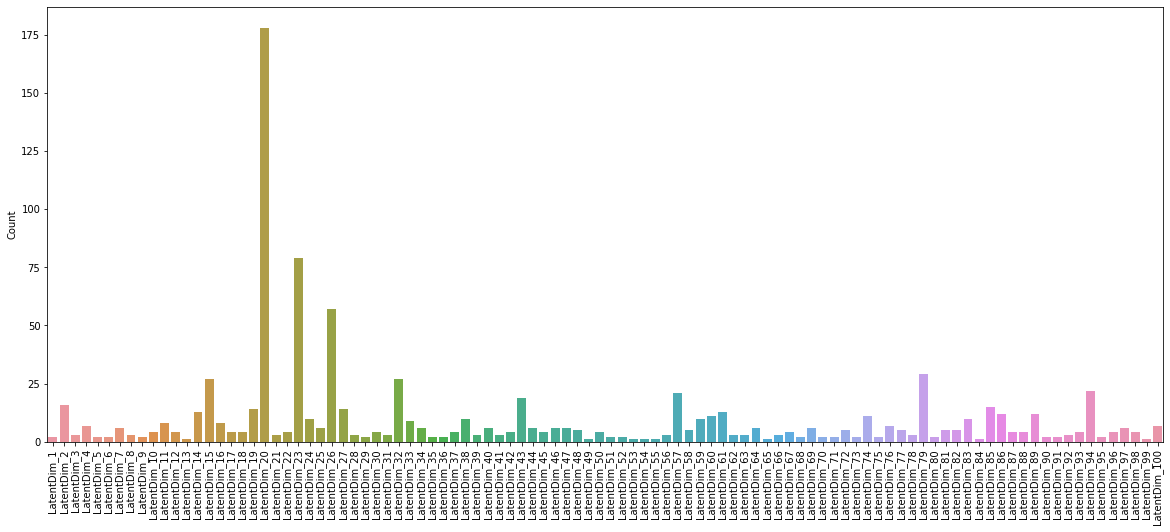

In [6]:
# Show the count of highest scoring genes per latent dim (scaled score > 0.85)
feature_variance_per_latent_dimension(adata, key="z_mvae", n_features=50, plot_highly_variable_features=True, 
                                          plot_cov_matrices=False, return_variable_features=False)

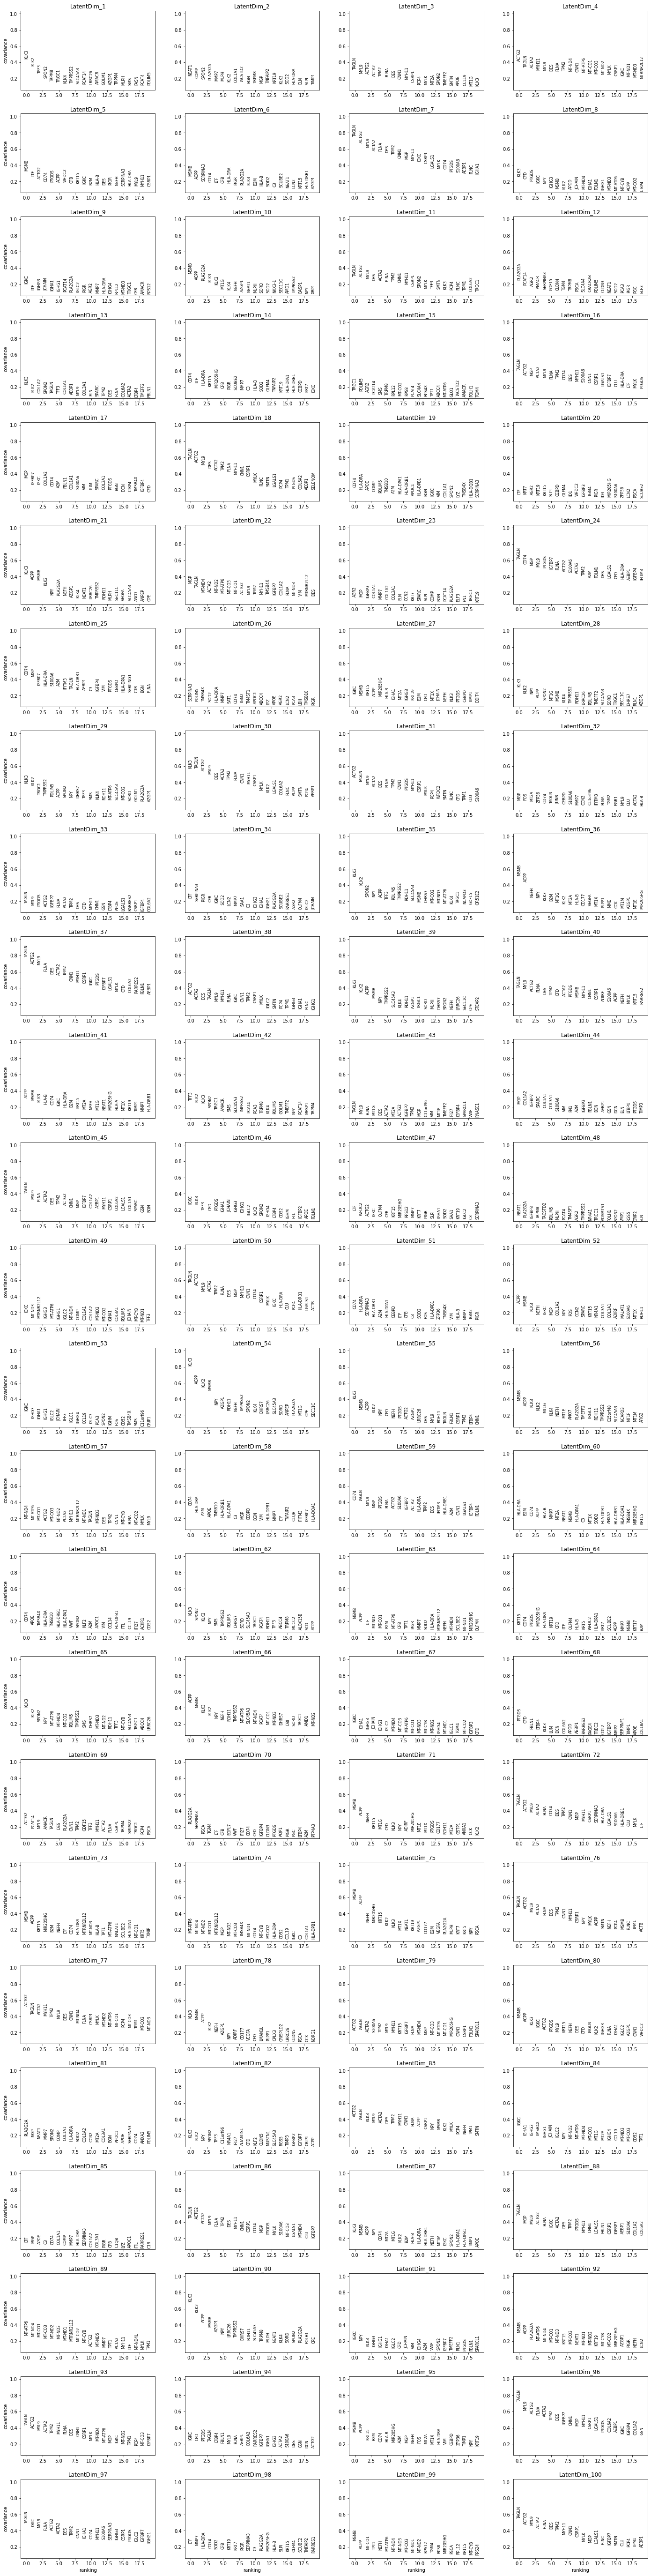

In [7]:
# Show the top 20 genes together with their variance for each latent dim
plot_feature_variance(adata) 

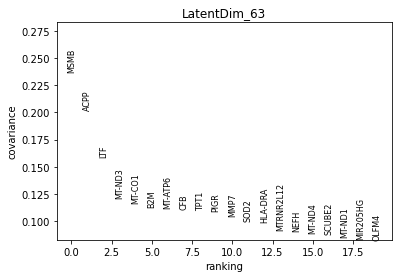

In [8]:
# Show the top 20 genes together with their variance for only one latent dim
plot_feature_variance(adata, groups=["LatentDim_63"])   

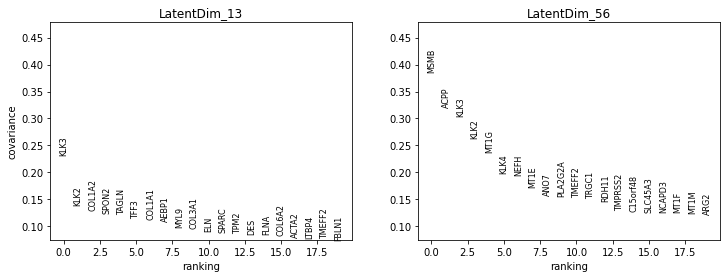

In [9]:
# Show the top 20 genes together with their variance for a subset of the latent dims
plot_feature_variance(adata, groups=["LatentDim_13", "LatentDim_56"])   